<a href="https://colab.research.google.com/github/Jakhongir0103/ML_learning/blob/main/Clustering_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [66]:
url="https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/customer_segmentation.csv"
df = pd.read_csv(url, index_col=0)
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
Customer Id,,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [67]:
df = df.dropna()
df.drop(columns='Address', inplace=True)

In [68]:
df_norm = StandardScaler().fit_transform(df.values)

In [69]:
k_means = KMeans(n_clusters = 3)
k_means.fit(df_norm)
df['cluster'] = k_means.labels_

In [70]:
df.groupby(by='cluster').min()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
cluster,,,,,,,,
0,20,1,0,14,0.073,0.161,0.0,0.9
1,26,1,5,30,0.288,1.003,0.0,2.3
2,20,1,0,14,0.012,0.046,0.0,0.4


In [71]:
df.groupby(by='cluster').mean()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
cluster,,,,,,,,
0,31.366460,1.850932,3.689441,30.484472,1.488199,2.734901,0.975155,13.936025
1,43.112000,1.960000,16.904000,96.056000,4.172896,7.811616,0.208000,14.398400
2,33.727053,1.601449,7.644928,36.246377,0.788126,1.748710,0.000000,7.581884


In [72]:
df.groupby(by='cluster').max()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
cluster,,,,,,,,
0,55,4,15,88,6.912,15.405,1.0,35.3
1,56,5,31,446,20.561,27.034,1.0,41.3
2,53,5,23,120,4.637,7.286,0.0,23.8


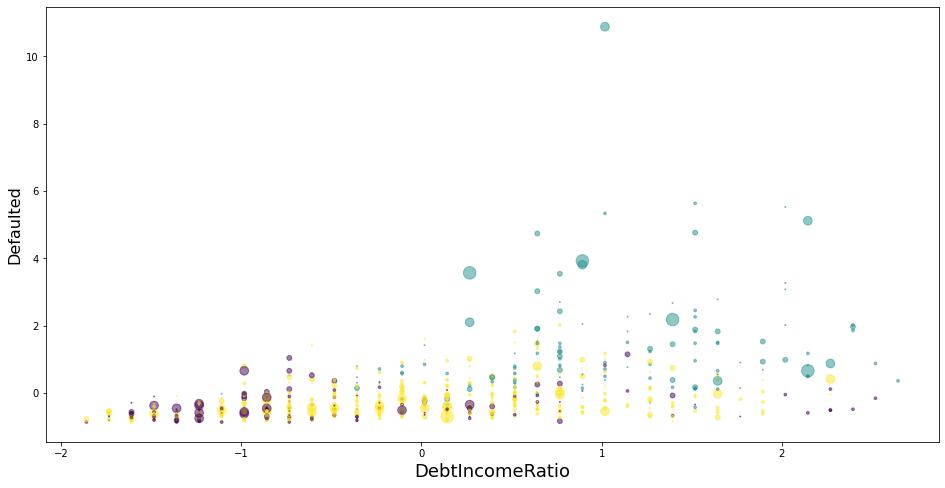

In [73]:
plt.figure(figsize=(16,8))

area = np.pi * ( df_norm[:, 1])**2  
plt.scatter(df_norm[:, 0], df_norm[:, 3], s=4*area, c=k_means.labels_.astype(float), alpha=0.5)
plt.xlabel('DebtIncomeRatio', fontsize=18)
plt.ylabel('Defaulted', fontsize=16)

plt.show()